<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Tomás Fontecilla </em><br>

</div>

# Machine Learning
*12 de Octubre de 2024*

#### Integrantes: 
` Mariangel Arrieta, Giuseppe Lavarello, Ingrid Solís, Rosario Valderrama `

## 1. Introducción
<div style="text-align: justify;">
La diabetes es una de las principales preocupaciones de salud a nivel mundial, afectando a millones de personas y contribuyendo significativamente a la mortalidad global. Esta enfermedad crónica ocurre cuando el cuerpo no produce suficiente insulina o no puede utilizarla de manera eficiente, lo que resulta en niveles elevados de glucosa en sangre. Si no se trata adecuadamente, la diabetes puede llevar a complicaciones graves, como enfermedades cardíacas, accidentes cerebrovasculares, insuficiencia renal, entre otras.
<br><br>  
El objetivo de este informe es analizar este conjunto de datos para identificar patrones o relaciones entre las variables que puedan predecir el diagnóstico de diabetes. Para ello, se aplicarán tanto modelos de aprendizaje no supervisado como supervisado.
</div>

## 2. Objetivo

El objetivo de este informe es realizar un análisis del conjunto de datos de **Indicadores de Salud de Diabetes** del **CDC** para:

1. Determinar los factores que contribuyen principalmente al diagnóstico de diabetes.

2. Aplicar modelos de aprendizaje automático que permitan predecir el diagnóstico de diabetes.

3. Comparar el rendimiento de los modelos aplicados, evaluando su efectividad en la clasificación de los pacientes y determinando cuáles variables son más influyentes en la predicción del estado de salud relacionado con la diabetes.


## 3. Metodología

La metodología a utilizar seguira una estructura general de varias etapas que incluyen la preparación de los datos, el análisis exploratorio, el desarrollo de modelos y la evaluación de resultados.

1. **Preparación de los Datos**

2. **Análisis Exploratorio de Datos (EDA)**

3. **Limpieza de Datos**

4. **Desarrollo de Modelos**:
   - **Modelo No Supervisado**
   
   - **Modelos Supervisados**
   
5. **Evaluación de Resultados**:

   - **Métricas de Evaluación**
   - **Interpretación de Resultados**

6. **Conclusiones y Recomendaciones**

### 3.1  Preparación de los Datos
#### 3.1.1  Importe de paquetes

In [216]:
#Es probable que no les corra a la primera, yo tube que instalar/actualizar estos paquetes

#%pip install ucimlrepo
#%pip install xgboost
#%pip install --upgrade scikit-learn
#%pip install --upgrade imbalanced-learn

In [217]:
# Importar paquetes
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo 
import missingno as msng

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight
from sklearn.decomposition import PCA

# from imblearn.over_sampling import ADASYN

from xgboost import XGBClassifier
from hyperopt import fmin, tpe, hp, STATUS_OK

# setear opciones
sns.set_theme()
pd.set_option('display.max_columns', None)

#### 3.1.2  Carga de Datos

In [218]:

# Buscar dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (como pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata (revisar markdown)
# print(cdc_diabetes_health_indicators.metadata) 
  
# informacion de variables 
print(cdc_diabetes_health_indicators.variables) 



                    name     role     type      demographic  \
0                     ID       ID  Integer             None   
1        Diabetes_binary   Target   Binary             None   
2                 HighBP  Feature   Binary             None   
3               HighChol  Feature   Binary             None   
4              CholCheck  Feature   Binary             None   
5                    BMI  Feature  Integer             None   
6                 Smoker  Feature   Binary             None   
7                 Stroke  Feature   Binary             None   
8   HeartDiseaseorAttack  Feature   Binary             None   
9           PhysActivity  Feature   Binary             None   
10                Fruits  Feature   Binary             None   
11               Veggies  Feature   Binary             None   
12     HvyAlcoholConsump  Feature   Binary             None   
13         AnyHealthcare  Feature   Binary             None   
14           NoDocbcCost  Feature   Binary             

##### Información de Variables


| **Nombre de Variable**     | **Rol**    | **Tipo**   | **Descripción**                                                          | **Unidades**       | **Valores Faltantes** |
|----------------------------|------------|------------|-------------------------------------------------------------------------|---------------------|---------------------|
| ID                         | ID         | Integer   | ID del paciente                                                                |                     | no                  |
| Diabetes_binary            | Target     | Binary    | 0 = sin diabetes, 1 = prediabetes o diabetes                                 |                     | no                  |
| HighBP                     | Feature    | Binary    | 0 = sin presión arterial alta, 1 = presión arterial alta                      |                     | no                  |
| HighChol                   | Feature    | Binary    | 0 = sin colesterol alto, 1 = colesterol alto                                   |                     | no                  |
| CholCheck                  | Feature    | Binary    | 0 = sin chequeo de colesterol en 5 años, 1 = sí chequeo de colesterol en 5 años |                     | no                  |
| BMI                        | Feature    | Integer   | Índice de Masa Corporal                                                         |                     | no                  |
| Smoker                     | Feature    | Binary    | 0 = no, 1 = sí (ha fumado al menos 100 cigarrillos en su vida)              |                     | no                  |
| Fruits                     | Feature    | Binary    | 0 = no, 1 = sí (consume fruta 1 o más veces al día)                          |                     | no                  |
| Veggies                    | Feature    | Binary    | 0 = no, 1 = sí (consume verduras 1 o más veces al día)                       |                     | no                  |
| HvyAlcoholConsump          | Feature    | Binary    | 0 = no, 1 = sí (consumo excesivo de alcohol)                                 |                     | no                  |
| AnyHealthcare              | Feature    | Binary    | 0 = no, 1 = sí (tiene algún tipo de cobertura de salud)                      |                     | no                  |
| NoDocbcCost               | Feature    | Binary    | 0 = no, 1 = sí (necesitó ver a un médico pero no pudo debido a costos)      |                     | no                  |
| GenHlth                   | Feature    | Integer   | Escala de salud general 1-5 (1 = excelente, 5 = mala)                        |                     | no                  |
| MentHlth                  | Feature    | Integer   | Días de mala salud mental en los últimos 30 días (escala 1-30)               | días                | no                  |
| PhysHlth                  | Feature    | Integer   | Días de mala salud física en los últimos 30 días (escala 1-30)               | días                | no                  |
| DiffWalk                   | Feature    | Binary    | 0 = no, 1 = sí (dificultad seria para caminar o subir escaleras)            |                     | no                  |
| Sex                        | Feature    | Binary    | 0 = mujer, 1 = hombre                                                          |                     | no                  |
| Stroke                     | Feature    | Binary    | 0 = no, 1 = sí (alguna vez le dijeron que tuvo un accidente cerebrovascular) |                     | no                  |
| HeartDiseaseorAttack       | Feature    | Binary    | 0 = no, 1 = sí (enfermedad cardíaca coronaria o infarto de miocardio)       |                     | no                  |
| PhysActivity               | Feature    | Binary    | 0 = no, 1 = sí (actividad física en los últimos 30 días, excluyendo el trabajo) |                     | no                  |

##### Dataset Metadata
| **Attribute**                    | **Value**                                                                                                                                                                                                                                                                                     |
|-----------------------------------|----------------------------------------------------------|
| **uci_id**                        | 891                                                                                                                                                                                                                                                                                           |
| **name**                          | CDC Diabetes Health Indicators                                                                                                                                                                                                                                                                 |
| **repository_url**                | [UCI Repository Link](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators)                                                                                                                                                                                                  |
| **data_url**                      | [Data Link](https://archive.ics.uci.edu/static/public/891/data.csv)                                                                                                                                                                                                                            |
| **abstract**                      | The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. |
| **area**                          | Health and Medicine                                                                                                                                                                                                                                                                           |
| **tasks**                         | Classification                                                                                                                                                                                                                                                                                |
| **characteristics**               | Tabular, Multivariate                                                                                                                                                                                                                                                                         |
| **num_instances**                 | 253680                                                                                                                                                                                                                                                                                        |
| **num_features**                  | 21                                                                                                                                                                                                                                                                                            |
| **feature_types**                 | Categorical, Integer                                                                                                                                                                                                                                                                          |
| **demographics**                  | Sex, Age, Education Level, Income                                                                                                                                                                                                                                                             |
| **target_col**                    | Diabetes_binary                                                                                                                                                                                                                                                                               |
| **index_col**                     | ID                                                                                                                                                                                                                                                                                            |
| **has_missing_values**            | no                                                                                                                                                                                                                                                                                            |
| **missing_values_symbol**         | None                                                                                                                                                                                                                                                                                          |
| **year_of_dataset_creation**      | 2017                                                                                                                                                                                                                                                                                          |
| **last_updated**                  | Fri Nov 03 2023                                                                                                                                                                                                                                                                               |
| **dataset_doi**                   | 10.24432/C53919                                                                                                                                                                                                                                                                               |
| **intro_paper ID**                | 308                                                                                                                                                                                                                                                                                           |
| **intro_paper type**              | NATIVE                                                                                                                                                                                                                                                                                        |
| **intro_paper title**             | Incidence of End-Stage Renal Disease Attributed to Diabetes Among Persons with Diagnosed Diabetes — United States and Puerto Rico, 2000–2014                                                                                                                                                   |
| **intro_paper authors**           | Nilka Rios Burrows, MPH; Israel Hora, PhD; Linda S. Geiss, MA; Edward W. Gregg, PhD; Ann Albright, PhD                                                                                                                                                                                         |
| **intro_paper venue**             | Morbidity and Mortality Weekly Report                                                                                                                                                                                                                                                          |
| **intro_paper year**              | 2017                                                                                                                                                                                                                                                                                          |
| **intro_paper URL**               | [Paper Link](https://www.cdc.gov/mmwr/volumes/66/wr/mm6643a2.htm)                                                                                                                                                                                                                             |
| **additional_info summary**       | Dataset link: https://www.cdc.gov/brfss/annual_data/annual_2014.html                                                                                                                                                                                                                           |
| **additional_info purpose**       | To better understand the relationship between lifestyle and diabetes in the US                                                                                                                                                                                                                 |
| **additional_info funded_by**     | The CDC                                                                                                                                                                                                                                                                                       |
| **instances_represent**           | Each row represents a person participating in this study.                                                                                                                                                                                                                                     |
| **recommended_data_splits**       | Cross validation or a fixed train-test split could be used.                                                                                                                                                                                                                                   |
| **sensitive_data**                | - Gender<br/>- Income<br/>- Education level                                                                                                                                                                                                                                                   |
| **preprocessing_description**     | Bucketing of age                                                                                                                                                                                                                                                                              |
| **variable_info**                 | - Diabetes diagnosis<br/>- Demographics (race, sex)<br/>- Personal information (income, educations)<br/>- Health history (drinking, smoking, mental health, physical health)                                                                                                                   |
| **external_url**                  | [Kaggle Dataset Link](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)                                                                                                                                                                                          |


In [219]:
df0=pd.concat([y,X], axis=1)

### 3.2 Análisis Exploratorio

In [220]:
# Mostrar las primeras 10 filas de los datos
df0.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4
5,0,1,1,1,25,1,0,0,1,1,1,0,1,0,2,0,2,0,1,10,6,8
6,0,1,0,1,30,1,0,0,0,0,0,0,1,0,3,0,14,0,0,9,6,7
7,0,1,1,1,25,1,0,0,1,0,1,0,1,0,3,0,0,1,0,11,4,4
8,1,1,1,1,30,1,0,1,0,1,1,0,1,0,5,30,30,1,0,9,5,1
9,0,0,0,1,24,0,0,0,0,0,1,0,1,0,2,0,0,0,1,8,4,3


In [221]:
# Recopilación de información básica sobre el conjunto de datos
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [222]:
# Notar que estan todas las Features consideradas como Int. Se cambia a Bool donde corresponda

binary_features = {
    "Diabetes_binary": bool,
    "HighBP": bool,
    "HighChol": bool,
    "CholCheck": bool,
    "Smoker": bool,
    "Stroke": bool,
    "HeartDiseaseorAttack": bool,
    "PhysActivity": bool,
    "Fruits": bool,
    "Veggies": bool,
    "HvyAlcoholConsump": bool,
    "AnyHealthcare": bool,
    "NoDocbcCost": bool,
    "DiffWalk": bool,
    "Sex": bool,
}
df0 = df0.astype(binary_features)

In [223]:
# Recopilación de estadísticas descriptivas sobre los datos
df0.describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,28.382364,2.511392,3.184772,4.242081,8.032119,5.050434,6.053875
std,6.608694,1.068477,7.412847,8.717951,3.054220,0.985774,2.071148
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,27.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,31.000000,3.000000,2.000000,3.000000,10.000000,6.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


In [224]:
# Mostrar el tamaño del DataFrame
df0.shape

(253680, 22)

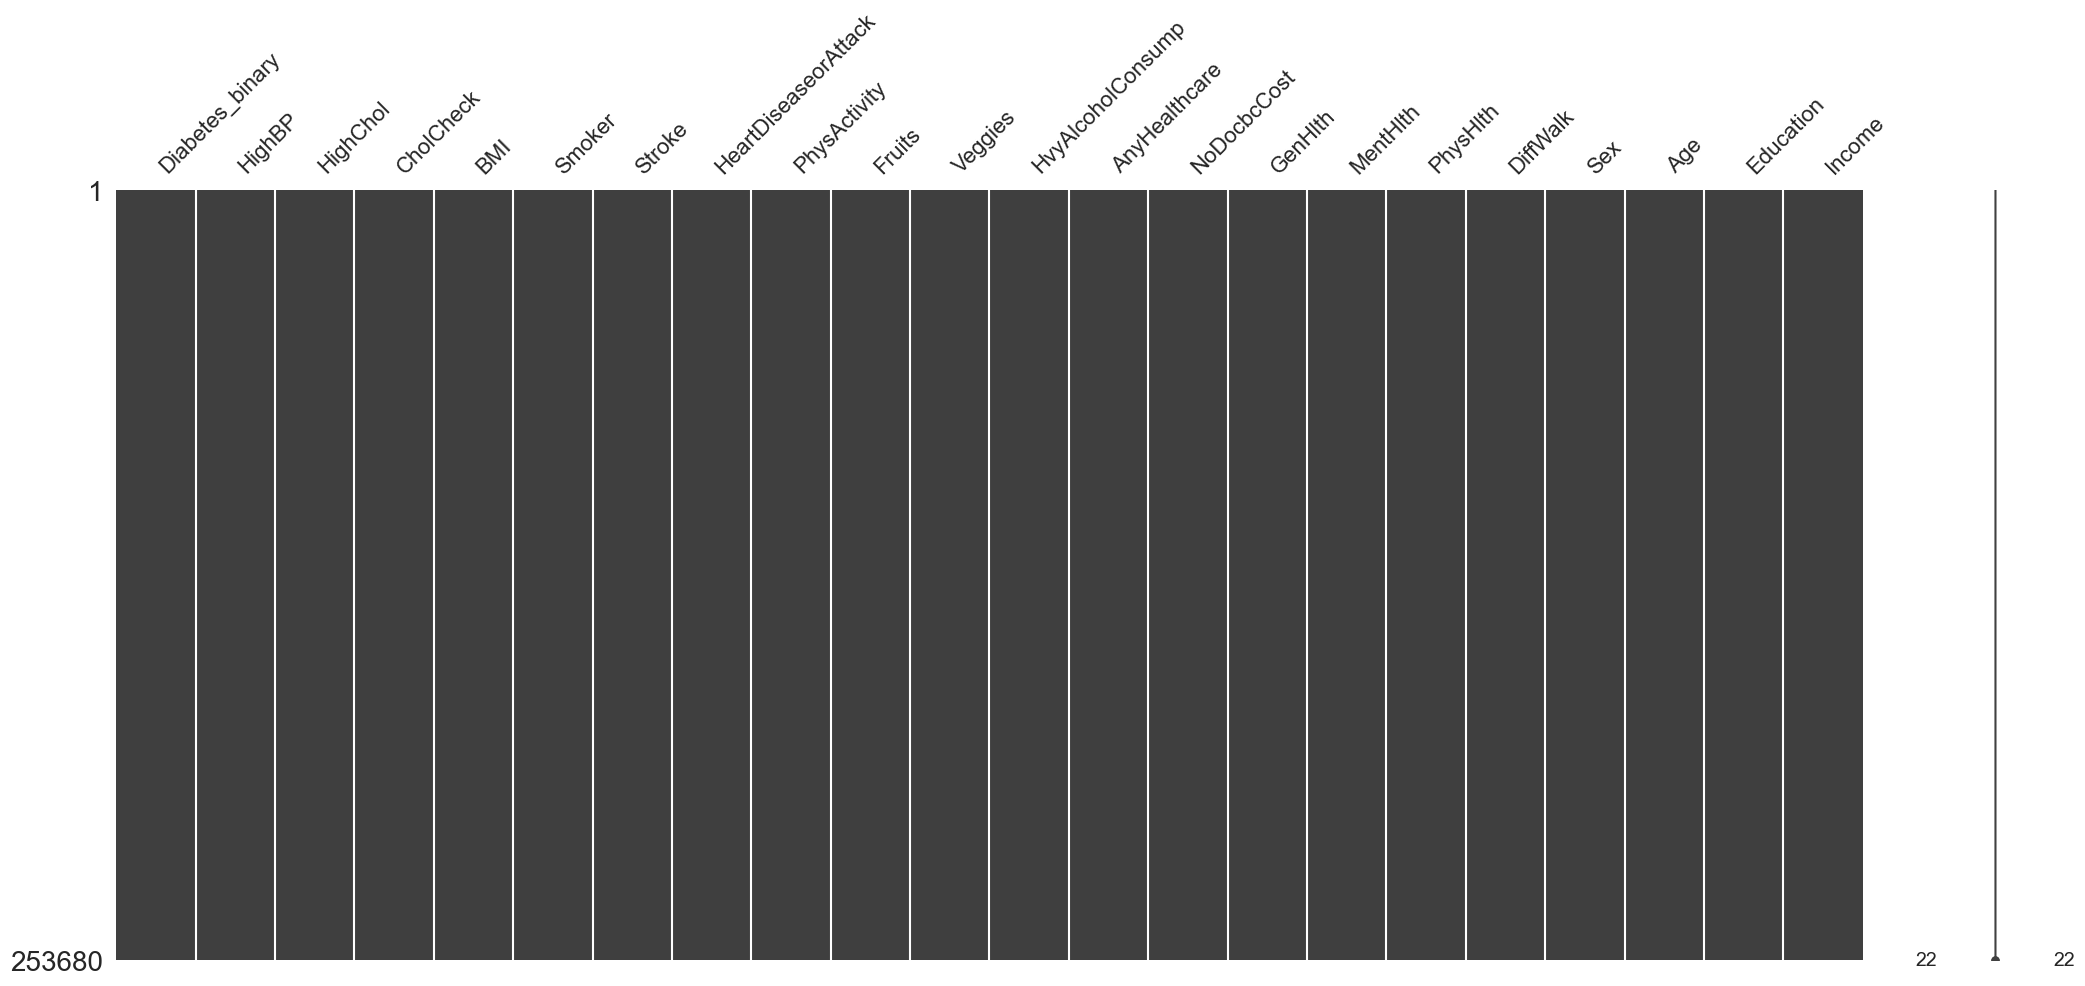

In [225]:
# Chequeo visual de Nans
msng.matrix(df0)
plt.show()

### 3.3 Limpieza de Datos

In [226]:
# Chequeo por dupes
duplicados = df0.duplicated().sum()

# Porcentage de dupes
porcentage = df0.duplicated().sum() / X.shape[0] * 100

print(f'{duplicados} filas contienen duplicados, lo que representa el {porcentage.round(2)}% del total de los datos.')


24206 filas contienen duplicados, lo que representa el 9.54% del total de los datos.


In [227]:
df1=df0 # Originalmente se eliminaron los duplicados aqui, pero se elimino ese paso por el desbalance de clases

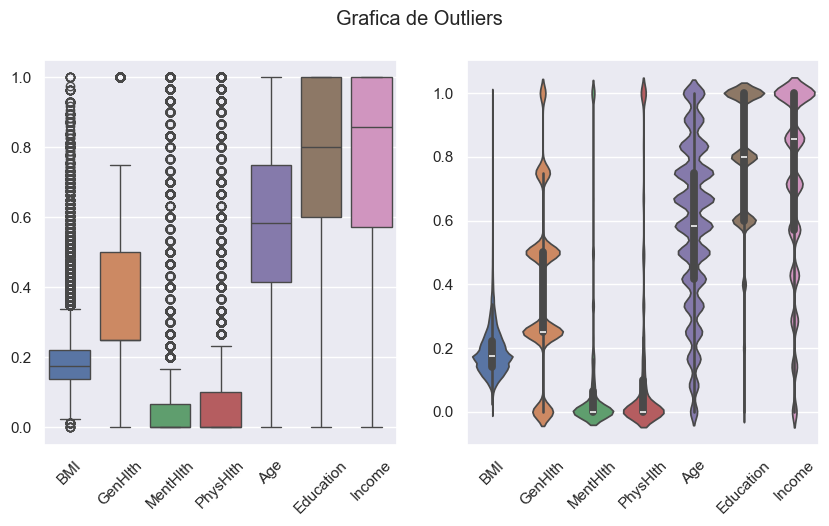

In [228]:
# Crear un boxplot para visualizar la distribución de todas las variables numéricas y detectar posibles valores atípicos
fig, axs= plt.subplots(1, 2, figsize=(10,5))
# seleccionar columnas numéricas
num_columns = df1.select_dtypes(include=['number'])

# normalizar los valores usando escalado Min-Max
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(num_columns)

# Crear un dataframe con los datos normalizados
df_normalized = pd.DataFrame(normalized_data, columns=num_columns.columns)
sns.boxplot(data= df_normalized, ax=axs[0])
sns.violinplot(data= df_normalized, ax=axs[1])

axs[0].tick_params(axis='x', rotation=45)
axs[1].tick_params(axis='x', rotation=45)

fig.suptitle('Grafica de Outliers')
plt.show()


In [229]:
# Bucle para recorrer cada columna numérica y detectar y contar valores atípicos
out_cols=['BMI', 'GenHlth', 'MentHlth', 'PhysHlth']
lims = {}
for column in out_cols:
    print(f"Procesando columna: {column}")
    
    # Calcular el valor del percentil 25
    percentil25 = df1[column].quantile(0.25)
    
    # Calcular el valor del percentil 75
    percentil75 = df1[column].quantile(0.75)
    
    # Calcular el rango intercuartil (IQR)
    iqr = percentil75 - percentil25
    
    # Definir los límites superior e inferior para los valores no atípicos
    limite_superior = percentil75 + 1.5 * iqr
    limite_inferior = percentil25 - 1.5 * iqr
    lims[column] = [limite_superior,limite_inferior]
    
    print(f"Límite inferior para {column}:", limite_inferior)
    print(f"Límite superior para {column}:", limite_superior)
    
    # Identificar los valores atípicos en la columna actual
    valores_atípicos = df1[(df1[column] > limite_superior) | (df1[column] < limite_inferior)]
    
    # Contar el número de filas con valores atípicos
    print(f"Número de filas que contienen valores atípicos en {column}: {len(valores_atípicos)}\n")


Procesando columna: BMI
Límite inferior para BMI: 13.5
Límite superior para BMI: 41.5
Número de filas que contienen valores atípicos en BMI: 9847

Procesando columna: GenHlth
Límite inferior para GenHlth: 0.5
Límite superior para GenHlth: 4.5
Número de filas que contienen valores atípicos en GenHlth: 12081

Procesando columna: MentHlth
Límite inferior para MentHlth: -3.0
Límite superior para MentHlth: 5.0
Número de filas que contienen valores atípicos en MentHlth: 36208

Procesando columna: PhysHlth
Límite inferior para PhysHlth: -4.5
Límite superior para PhysHlth: 7.5
Número de filas que contienen valores atípicos en PhysHlth: 40949



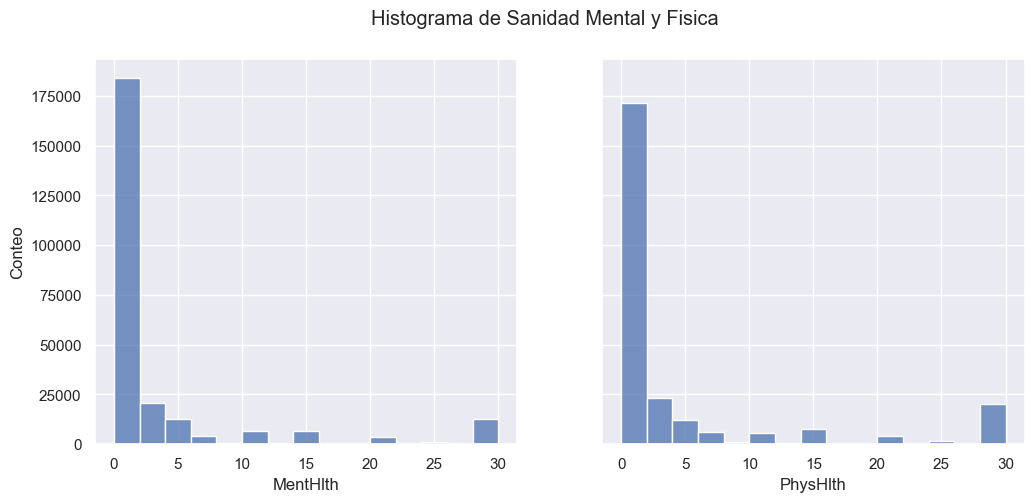

In [230]:
fig, axs = plt.subplots(1, 2, figsize=(12,5),sharey=True)
sns.histplot(data=df1, x='MentHlth',ax=axs[0], binwidth=2)
sns.histplot(data=df1, x='PhysHlth',ax=axs[1], binwidth=2)

axs[0].set_ylabel('Conteo')
fig.suptitle('Histograma de Sanidad Mental y Fisica')

plt.show()

**Desición** Dado que la mayoría de los individuos parecen estar sanos (con pocos reportes de días con problemas de salud), estas columnas pueden no aportar suficiente información relevante para la predicción del diagnóstico de diabetes que es una enfermedad cronica.

In [231]:
# Usar una máscara booleana para eliminar valores atípicos
mask = True
for column, lim in lims.items():
    if column == 'GenHlth': continue
    mask &= ((df1[column] <= lim[0]) & (df1[column] >= lim[1]))
df2 = df1[mask].copy()


In [232]:
df2.drop(columns=['PhysHlth','MentHlth'], inplace=True)

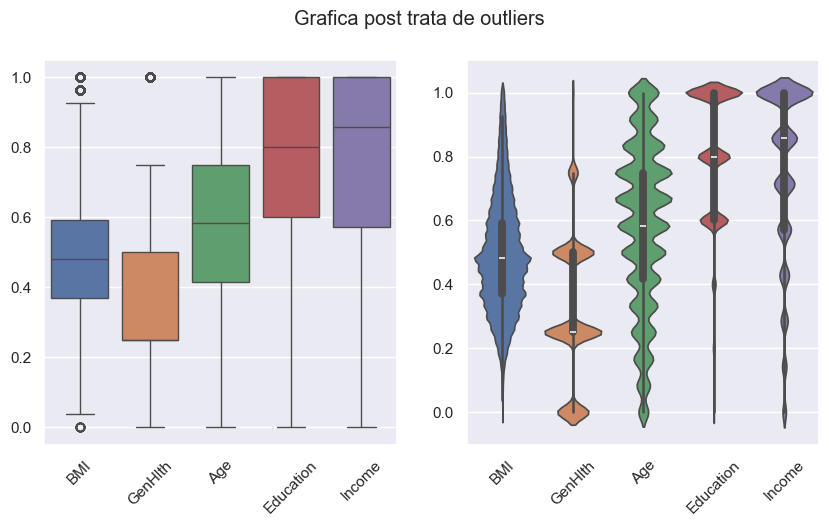

In [233]:
# Crear un boxplot para visualizar la distribución de todas las variables numéricas y detectar posibles valores atípicos
fig, axs= plt.subplots(1, 2, figsize=(10,5))
# seleccionar columnas numéricas
num_columns = df2.select_dtypes(include=['number'])

# normalizar los valores usando escalado Min-Max
scaler = MinMaxScaler()
normalized_data2 = scaler.fit_transform(num_columns)

# Crear un dataframe con los datos normalizados
df_normalized2 = pd.DataFrame(normalized_data2, columns=num_columns.columns)
sns.boxplot(data= df_normalized2, ax=axs[0])
sns.violinplot(data= df_normalized2, ax=axs[1])

axs[0].tick_params(axis='x', rotation=45)
axs[1].tick_params(axis='x', rotation=45)

fig.suptitle('Grafica post trata de outliers')
plt.show()

### 3.4 Desarrollo de Modelos

In [234]:
# Preparar características (X) y la variable objetivo (y)
X = df2.drop(['Diabetes_binary'], axis=1)  
y = df2['Diabetes_binary']


# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5555)


# ada = ADASYN(random_state=5555)
# X_train, y_train = ada.fit_resample(X_train, y_train)

In [235]:
def plt_conf_matrix(y_test,y_pred):
    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Graficar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.show()

#### 3.4.1 Modelo No Supervisado


- PCA

In [236]:
# determinar características de entrenamiento
features = X 

# Estandarizar las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicar PCA
pca = PCA(n_components=1) # Dado que son 2 clases y n_componentes es min de n clases-1 y n features  
pca_result = pca.fit_transform(features_scaled)


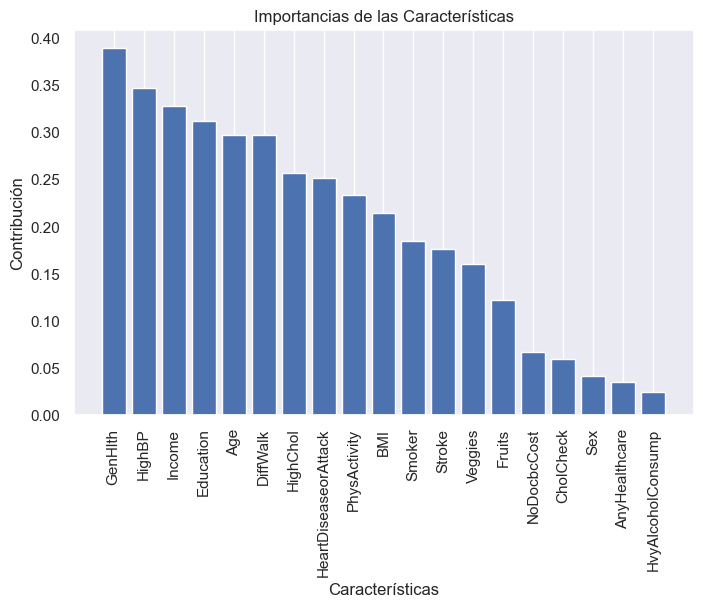

In [237]:
# Obtener las cargas de la primera componente principal
componentes = pca.components_[0]  

# Identificar las 4 Principales Características
indices_top = np.argsort(np.abs(componentes))[::-1]  
características_top = X.columns[indices_top]  
contribuciones_top = componentes[indices_top]  

important = {'pca': np.array(X.columns)[indices_top][:4] }

# Graficar Contribuciones de las características
plt.figure(figsize=(8, 5))
plt.bar(características_top, np.abs(contribuciones_top))
plt.title('Importancias de las Características')
plt.xlabel('Características')
plt.ylabel('Contribución')
plt.xticks(rotation=90)  # Rotar los nombres de las características para mejor legibilidad
plt.grid(axis='y')
plt.show()


- Regresión Logistica sobre PCA

              precision    recall  f1-score   support

       False       0.95      0.73      0.83     33287
        True       0.24      0.70      0.36      4074

    accuracy                           0.73     37361
   macro avg       0.60      0.71      0.59     37361
weighted avg       0.87      0.73      0.78     37361



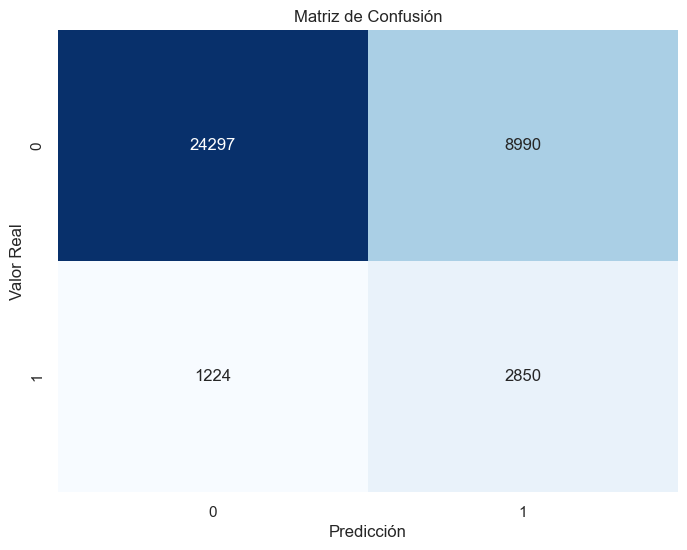

In [238]:
#Split de data pca
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_result, y, test_size=0.2, random_state=5555)

# Crear y ajustar el modelo de Regresión Logística
logreg_model = LogisticRegression(random_state=5555, max_iter=1000, class_weight='balanced')  
logreg_model.fit(X_train_pca, y_train_pca)

# Hacer predicciones
y_pred_logreg = logreg_model.predict(X_test_pca)

# Evaluar el modelo
print(classification_report(y_test_pca, y_pred_logreg))

plt_conf_matrix(y_test,y_pred_logreg)




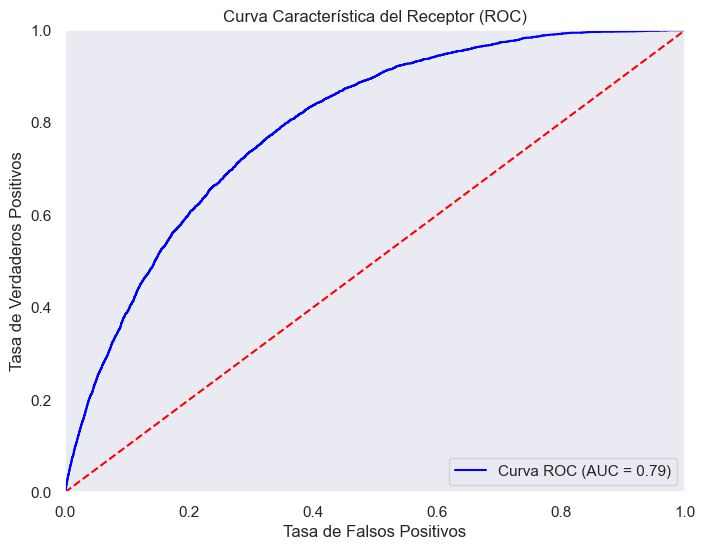

In [239]:

# Obtener las probabilidades predichas para la clase positiva
y_probs_logreg = logreg_model.predict_proba(X_test_pca)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_pca, y_probs_logreg)

# Calcular el AUC
roc_auc = roc_auc_score(y_test_pca, y_probs_logreg)
roc_aucs={'pca' : roc_auc}
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica del Receptor (ROC)')
plt.legend(loc='lower right')
plt.grid()

plt.show()

#### 3.4.2 Modelos Supervisados

##### Arbol de Decision

              precision    recall  f1-score   support

       False       0.96      0.68      0.80     33287
        True       0.23      0.79      0.36      4074

    accuracy                           0.69     37361
   macro avg       0.60      0.74      0.58     37361
weighted avg       0.88      0.69      0.75     37361



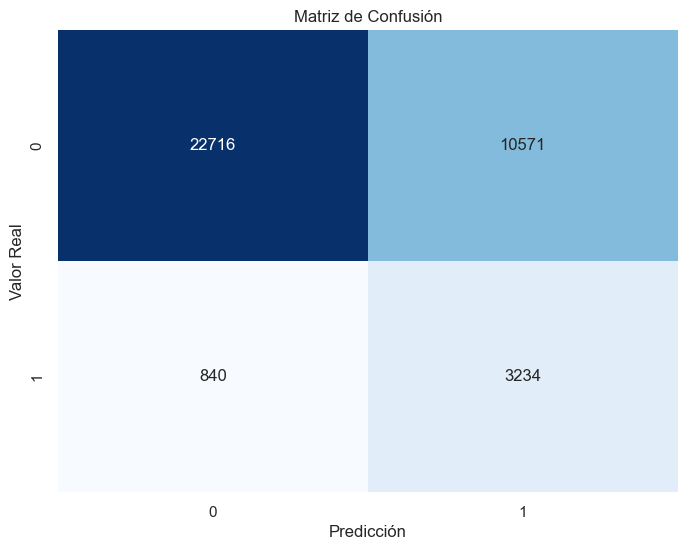

In [240]:
# Crear y ajustar el árbol de desición
arbol = DecisionTreeClassifier(random_state=5555, max_depth= 10, class_weight='balanced')
arbol.fit(X_train,y_train)

# Hacer predicciones
y_preds_arbol = arbol.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_preds_arbol))

plt_conf_matrix(y_test,y_preds_arbol)




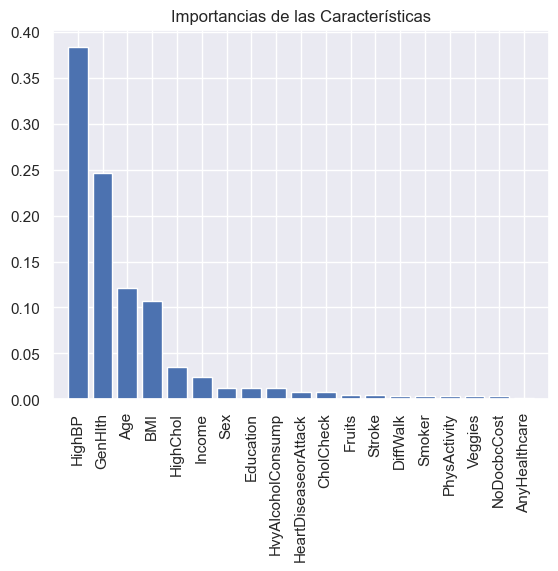

In [241]:
# Importancias de las características
importances_dtree = arbol.feature_importances_
indices = np.argsort(importances_dtree)[::-1]

important['arbol']= np.array(X.columns)[indices][:4]

# Graficar las importancias de las características
plt.figure()
plt.title('Importancias de las Características')
plt.bar(range(X.shape[1]), importances_dtree[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices],rotation=90,)
plt.xlim([-1, X.shape[1]])
plt.show()

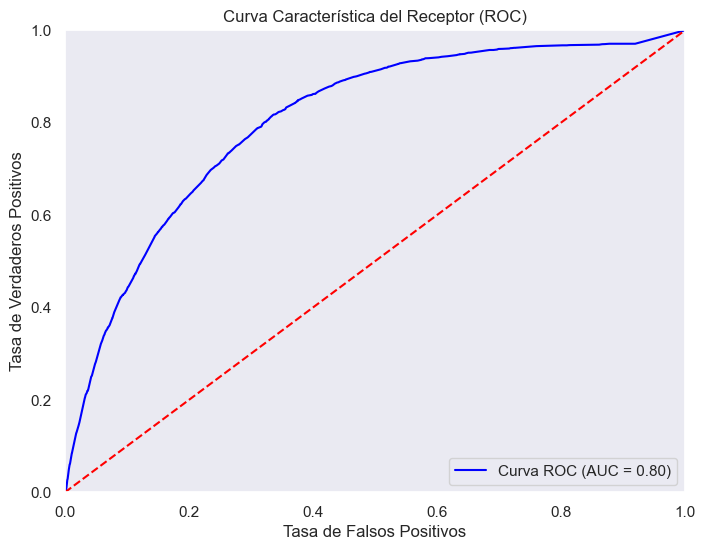

In [242]:

# Obtener las probabilidades predichas para la clase positiva
y_probs_arbol = arbol.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_arbol)

# Calcular el AUC
roc_auc = roc_auc_score(y_test, y_probs_arbol)
roc_aucs['arbol']=roc_auc

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica del Receptor (ROC)')
plt.legend(loc='lower right')
plt.grid()

plt.show()

##### Random Forest


              precision    recall  f1-score   support

       False       0.96      0.73      0.83     33287
        True       0.26      0.78      0.39      4074

    accuracy                           0.73     37361
   macro avg       0.61      0.75      0.61     37361
weighted avg       0.89      0.73      0.78     37361



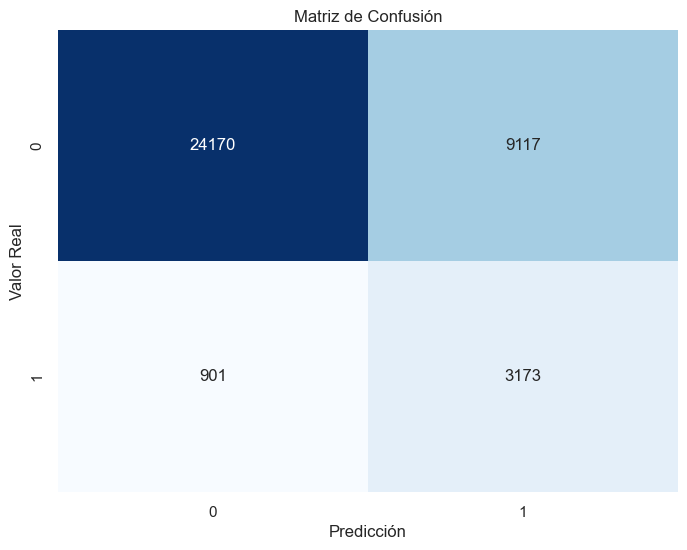

In [243]:
# Crear y ajustar el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10 ,random_state=5555, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_rndforest = rf_model.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred_rndforest))

plt_conf_matrix(y_test,y_pred_rndforest)




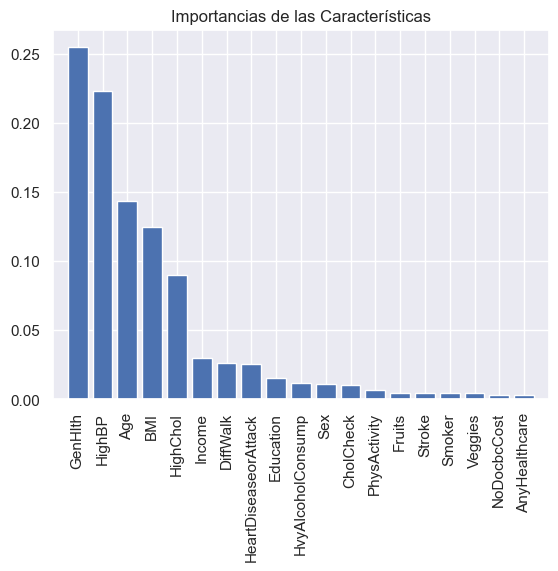

In [244]:
# Importancias de las características
importances_rf = rf_model.feature_importances_
indices = np.argsort(importances_rf)[::-1]

important['rand_forst'] = np.array(X.columns)[indices][:4]

# Graficar las importancias de las características
plt.figure()
plt.title('Importancias de las Características')
plt.bar(range(X.shape[1]), importances_rf[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices],rotation=90,)
plt.xlim([-1, X.shape[1]])
plt.show()

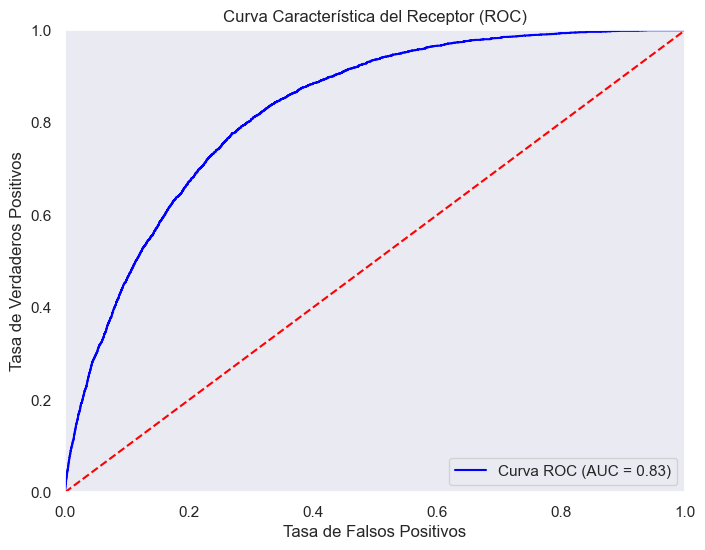

In [245]:
# Obtener las probabilidades predichas para la clase positiva
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular el AUC
roc_auc = roc_auc_score(y_test, y_probs)
roc_aucs['rand_forst']=roc_auc
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica del Receptor (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

##### AdaBoost

              precision    recall  f1-score   support

       False       0.96      0.73      0.83     33287
        True       0.26      0.77      0.38      4074

    accuracy                           0.73     37361
   macro avg       0.61      0.75      0.61     37361
weighted avg       0.89      0.73      0.78     37361



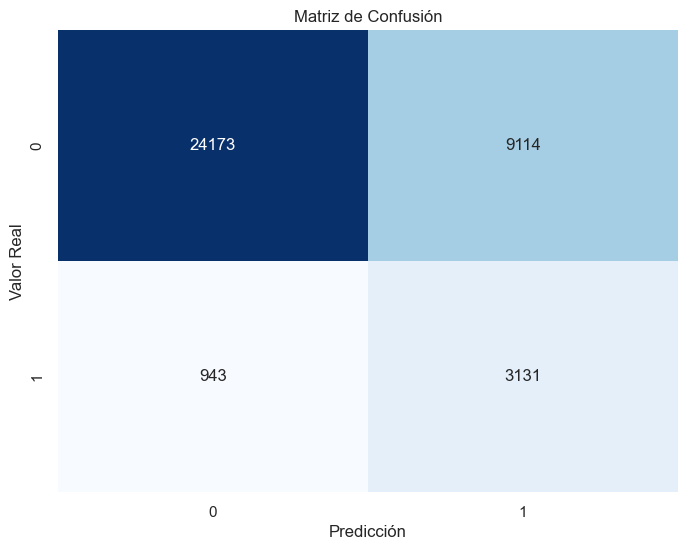

In [246]:

# Calcular pesos de clase
class_weights = class_weight.compute_sample_weight('balanced', y_train)

# Crear y ajustar el modelo de AdaBoost
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=5555, algorithm='SAMME')
adaboost_model.fit(X_train, y_train, sample_weight=class_weights)


# Hacer predicciones
y_pred_adaboost = adaboost_model.predict(X_test)


# Evaluar el modelo
print(classification_report(y_test, y_pred_adaboost))

plt_conf_matrix(y_test,y_pred_adaboost)

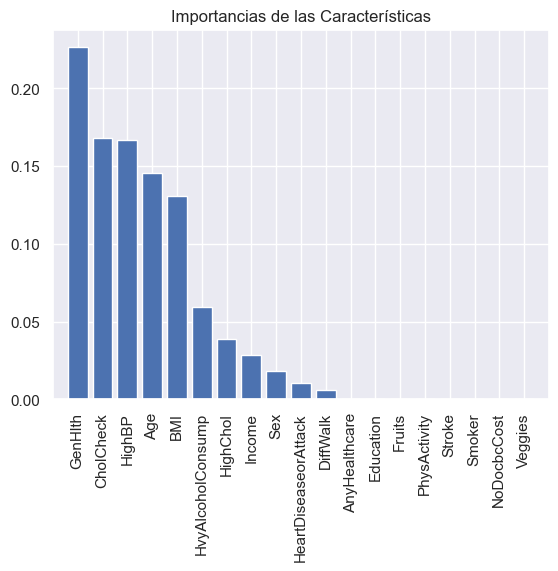

In [247]:
# Importancias de las características
importances_adaboost = adaboost_model.feature_importances_
indices = np.argsort(importances_adaboost)[::-1]

important['adaboost'] = np.array(X.columns)[indices][:4]

# Graficar las importancias de las características
plt.figure()
plt.title('Importancias de las Características')
plt.bar(range(X.shape[1]), importances_adaboost[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices],rotation=90,)
plt.xlim([-1, X.shape[1]])
plt.show()

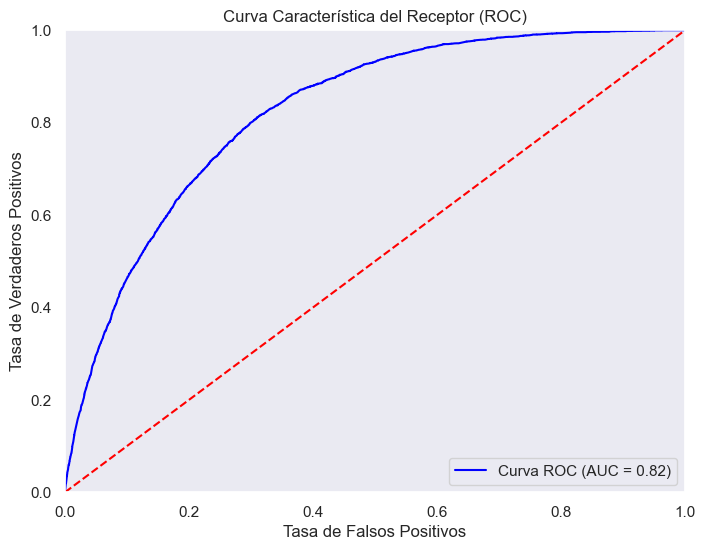

In [248]:
# Obtener las probabilidades predichas para la clase positiva
y_probs = adaboost_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular el AUC
roc_auc = roc_auc_score(y_test, y_probs)
roc_aucs['adaboost'] = roc_auc

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica del Receptor (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

##### XGBoost
- Optimizacion de hiperparametros (Comentado por velocidad)

In [249]:
# # Calcular el peso para la clase positiva
# scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# # Definir el espacio de hiperparámetros
# space = {
#     'max_depth': hp.quniform('max_depth', 2, 8, 1),  # Se convertirá a int en la función objetivo
#     'learning_rate': hp.loguniform('learning_rate', -5, -1),  # Entre exp(-5) y exp(-1)
#     'subsample': hp.uniform('subsample', 0.5, 1),  # Entre 0.5 y 1
#     'scale_pos_weight' : scale_pos_weight
# }

# # Definir la función objetivo a minimizar
# def objective(params):
#     params['max_depth'] = int(params['max_depth'])  # Convertir max_depth a entero
#     xgb_model = XGBClassifier(**params)
    
#     # Entrenar el modelo
#     xgb_model.fit(X_train, y_train)
    
#     # Predecir sobre los datos de prueba
#     y_pred = xgb_model.predict(X_test)
    
#     # Calcular la precisión
#     score = accuracy_score(y_test, y_pred)
    
#     # Como hyperopt minimiza la pérdida, devolvemos la precisión negativa
#     return {'loss': -score, 'status': STATUS_OK}

# # Realizar la optimización
# best_params = fmin(fn=objective, 
#                    space=space, 
#                    algo=tpe.suggest, 
#                    max_evals=100)

# print("Mejor conjunto de hiperparámetros: ", best_params)
best_params = {'learning_rate': 0.3478486620832284,
               'max_depth': 8,
               'subsample': 0.7838745459671581}

100%|██████████| 100/100 [01:16<00:00,  1.31trial/s, best loss: -0.7507026043200129]
Mejor conjunto de hiperparámetros:  {'learning_rate': 0.3478486620832284, 'max_depth': 8.0, 'subsample': 0.7838745459671581}


- Modelo

              precision    recall  f1-score   support

       False       0.90      0.98      0.94     33287
        True       0.45      0.12      0.19      4074

    accuracy                           0.89     37361
   macro avg       0.67      0.55      0.57     37361
weighted avg       0.85      0.89      0.86     37361



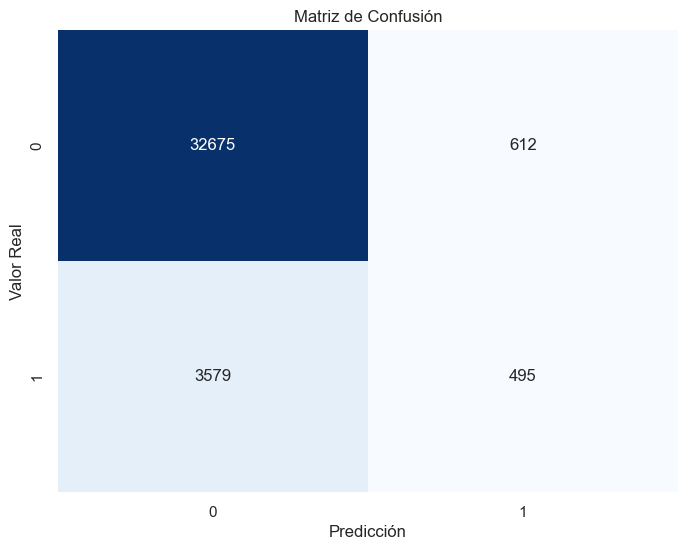

In [283]:
# Crear y ajustar el modelo de XGBoost
best_params['max_depth'] = int(best_params['max_depth'])
xgb_model = XGBClassifier(**best_params, random_state=5555) # learning_rate= 0.1, max_depth= 10, subsample= 0.8, random_state=5555, scale_pos_weight=scale_pos_weight)
xgb_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_xgboost = xgb_model.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred_xgboost))

plt_conf_matrix(y_test,y_pred_xgboost)



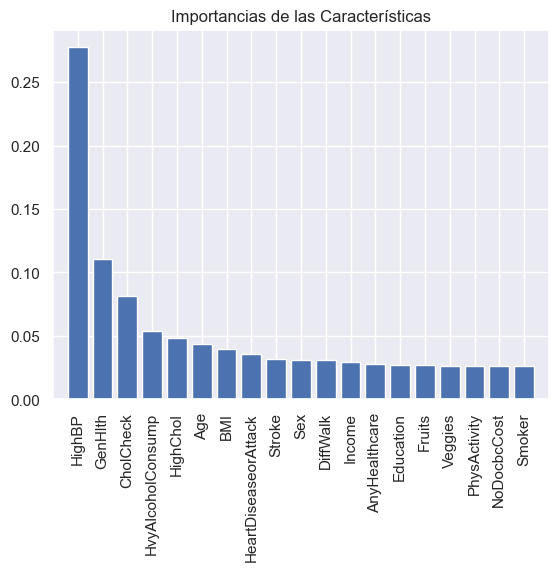

In [251]:
# Importancias de las características
importances_xgboost = xgb_model.feature_importances_
indices = np.argsort(importances_xgboost)[::-1]

important['xgboost']= np.array(X.columns)[indices][:4]

# Graficar las importancias de las características
plt.figure()
plt.title('Importancias de las Características')
plt.bar(range(X.shape[1]), importances_xgboost[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices],rotation=90,)
plt.xlim([-1, X.shape[1]])
plt.show()

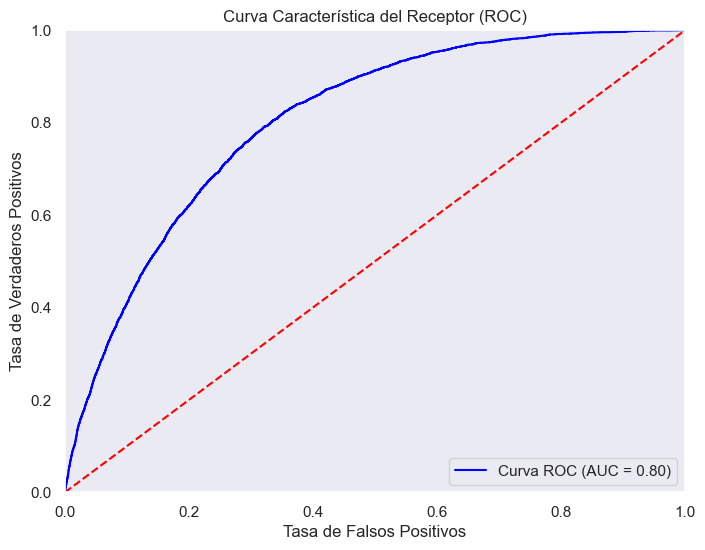

In [252]:
# Obtener las probabilidades predichas para la clase positiva
y_probs = xgb_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular el AUC
roc_auc = roc_auc_score(y_test, y_probs)
roc_aucs['xgboost']=roc_auc
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica del Receptor (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### 3.5 Interpretacion de Resultados

<div style="text-align: justify;">
Los informes de clasificación muestran métricas que indican un rendimiento desigual entre las clases <code>False</code> y <code>True</code>, lo que refleja un problema de desbalanceo en los datos. Si bien se intentó mejorar este problema mediante el manejo interno de los modelos, queda claro que esto no fue suficiente para lograr una clasificación equilibrada para ambos casos.
Fuera de eso, los modelos se comportaron de manera aceptable, pero es difícil considerar esto como un logro, dado que solo al clasificar todos los valores como <code>False</code> se podría alcanzar una métrica de clasificación similar.
</div>


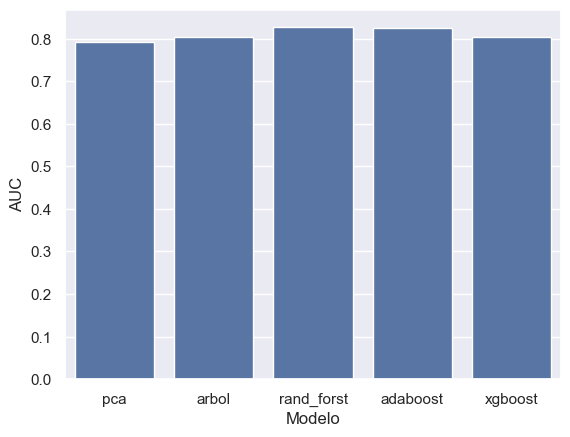

In [272]:
# Create a DataFrame from the dictionaries
concl = pd.DataFrame({
    'Modelo': list(roc_aucs.keys()),
    'AUC': list(roc_aucs.values()),
    'Features': [important[key] for key in roc_aucs.keys()]
})
sns.barplot(data=concl, x='Modelo', y='AUC')

plt.show()


Es notable que el modelo de XGBoost, a pesar de ser el más optimizado, no logró obtener resultados mejores que el modelo de Random Forest.

In [281]:
# Crear una lista de características únicas y contar sus apariciones
checkeo = [feature for sublist in concl['Features'] for feature in sublist]
feature_count = pd.Series(checkeo).value_counts()

# Imprimir el conteo de cada característica
print(feature_count)


GenHlth              5
HighBP               5
Age                  3
BMI                  2
CholCheck            2
Income               1
Education            1
HvyAlcoholConsump    1
Name: count, dtype: int64


1. **GenHlth (5)**:
   - Es la variable más frecuente, indicando su obvia auto-relevancia en la salud general de los individuos.

2. **HighBP (5)**:
   - Igualmente frecuente, refleja la importancia de la hipertensión en la salud y su relación con la diabetes.

3. **Age (3)**:
   - La edad es un factor clave, sugiriendo que el riesgo de esta enfermedad aumenta con el tiempo.

4. **BMI (2)**:
   - Indica que el índice de masa corporal es relevante para evaluar el riesgo de diabetes.

5. **CholCheck (2)**:
   - Los chequeos de colesterol son importantes en la evaluación de la salud cardiovascular, probablemente es su correlacion con HighBP lo que juega un factor.

6. **Income (1)**:
   - Aunque aparece solo una vez, sugiere que el nivel de ingresos puede influir en la salud, aunque es menos relevante que otras variables. Esto es sorprendente, considerando que los datos provienen del CDC, un organismo estadounidense.

7. **Education (1)**:
   - Similar a `Income`, el nivel educativo puede estar relacionado con la salud, pero no es tan determinante. Probablemente sea un caso similar al anterior

8. **HvyAlcoholConsump (1)**:
   - La frecuencia de consumo excesivo de alcohol es una preocupación, aunque aparece con menor regularidad en este contexto.

### 3.6 Conclusiones y Recomendaciones
<div style="text-align: justify;">
Los informes de clasificación indican que los modelos de predicción enfrentan un desbalance significativo entre las clases `False` y `True`, lo que sugiere que las métricas de rendimiento no reflejan adecuadamente la capacidad del modelo para clasificar ambas clases. Aunque se realizaron intentos de ajustar los modelos para abordar este problema, los resultados muestran que estas medidas no fueron suficientes para lograr un desempeño equilibrado. Entre las variables analizadas, GenHlth y HighBP se destacan como las más frecuentes, subrayando su relevancia en la salud general y en la relación con la diabetes. Esto sugiere que la autoevaluación de la salud y la hipertensión son factores cruciales que deben considerarse en estudios futuros y en el desarrollo de intervenciones. Para mejorar la clasificación, se recomienda implementar técnicas de balanceo de clases como el sobremuestreo de la clase minoritaria (por ejemplo, SMOTE) o el submuestreo de la clase mayoritaria para equilibrar la distribución de las clases y mejorar el rendimiento del modelo. Adicionalmente, es importante realizar una optimización de hiperparámetros a través de técnicas como búsqueda en cuadrícula (Grid Search) o búsqueda aleatoria (Random Search) para mejorar el ajuste del modelo a los datos.
</div>




###